**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


***Ход исследования:***

Шаг 1. Изучим общую информацию
- Путь к файлу: /datasets/games.csv.


Шаг 2. Подготовим данные
- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы;
- Обработаем при необходимости пропуски;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.


Шаг 3. Проведем исследовательский анализ данных
- Посмотрим, сколько игр выпускалось в разные годы;
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы;
- Посмотрим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами;
- Посмотрим на общее распределение игр по жанрам.


Шаг 4. Составим портрет пользователя каждого региона
- Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5).
- Оценим влияет ли рейтинг ESRB на продажи в отдельном регионе.


Шаг 5. Проверим гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


- Шаг 6. Написание общего вывода


**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Загрузка данных и ознакомление с ними

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
def data_information(dataset):
    print('Первые строки таблицы:')
    print('')
    display(dataset.head())
    print('Информация о таблице:')
    print('')
    display(dataset.info())

In [4]:
data_information(games)

Первые строки таблицы:



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

**Первичные наблюдения:**
- Всего в датасете 16715 строк и 11 столбцов;
- Столбцы **platform**, **na_sales**, **eu_sales**, **jp_sales**, **other_sales** не имеют пропусков;
- Столбцы **name**, **genre** имеют по 2 пропуска, а столбец **year_of_release** содержит 269 пропусков;
- Много пропусков в столбцах **critic_score**, **user_score** и **rating**;
- В столбцах **year_of_release** и **user_score** есть также необхомость преобразовать данные.

На этапе предобработки данных проанализируем все столбцы датасета детальнее.

## Шаг 2. Предобработка данных

#### Приведем к нижнему регистру названия столбцов в датасете:

In [5]:
games.columns = games.columns.str.lower()

#### Проверим есть ли дубликаты:

In [6]:
games.duplicated().sum()

0

Явные дубликаты в датасете отсутствуют

#### Посмотрим на уникальные значения в столбцах:

In [7]:
display(games['year_of_release'].unique())
display(games['genre'].unique())
display(games['critic_score'].unique())
display(games['user_score'].unique())
display(games['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В некоторых столбцах видим значения nan, но с ними разберемся позже.

Среди уникальных значений в столбце **user_score** обращает на себя внимание значение 'tbd'. TBD – это аббревиатура, которая означает фразу "To Be Determined" и используется, если какая-то информация еще не определена (в нашем случае рейтинг еще не определен), по сути это тот же самый пропуск.

In [8]:
#посмотрим сколько таких значений в столбце
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
0.2       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Получается в столбце имеется еще 2424 дополнительных пропуска. Заменим значение 'tbd' на NaN.

In [9]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN, regex=True)

In [10]:
#проверим произошла ли замена
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Рассмотрим подробнее, что означают буквы в столбце **rating**. Рейтинг ESRB определяет рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в США, Канаде и Мексике.

- EC («Early childhood») - для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. 
- E («Everyone») - подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
- E 10+ («Everyone 10 and older») - подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 
- T («Teen») - подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
- M («Mature») - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 
- AO («Adults Only 18+») - подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. 
- RP («Rating Pending») - Категория ещё не присвоена. 

В нашем столбце мы можем увидеть еще категорию K-A («Kids to Adults»). Эта категория в рейтинге ESRB в свое время была заменена на Е. 
Для более точного анализа осуществим замену в датасете.

In [11]:
games['rating'] = games['rating'].replace('K-A', 'E', regex=True)
games['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

#### Работа с пропусками:

In [12]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [13]:
#посмотрим также на пропуски в процентном соотношении
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Всего в датасете 16 715 строк. Пропуски полностью отсутствуют в столбцах: **platform**, **na_sales**, **eu_sales**, **jp_sales**, **other_sales**.

Столбцы **name**, **genre** имеют по 2 пропуска, можем сразу их удалить. 

Столбец **year_of_release** содержит 269 пропусков, что составляет около 2% датасета и в случае удаления, не повлияет на выводы.  

Мы видим большое количество пропусков в столбцах **critic_score**, **user_score** и **rating**. Причиной отсутствия рейтинга может быть просто отсутствие оценок в силу того, что игры вышли давно или же наоборот вышли совсем недавно и еще не получили свои оценки. Замена пропусков в этих столбцах на среднее или медианное значение может критично повлиять на выводы, у нас есть варианты или оставить пропуски как есть или поставить вместо них какое-то значение (например, -1).

In [14]:
#удалим столбцы
games = games.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)

In [15]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [16]:
#заменим пропуски в столбцах на -1
games.loc[games['critic_score'].isna(), 'critic_score'] = -1
games.loc[games['user_score'].isna(), 'user_score'] = -1

In [17]:
#заменим пропуски на значение 'unknown'
games['rating']=games['rating'].fillna('unknown')

In [18]:
#перепроверим
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [19]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,unknown


#### Преобразование типов данных:

Есть необходимость изменить типы данных в столбцах **year_of_release** и **user_score**

In [20]:
games['year_of_release'] = games['year_of_release'].astype('int32')
games['user_score'] = games['user_score'].astype('float32')

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(5), int32(1), object(4)
memory usage: 1.3+ MB


#### Добавление нового столбца с информацией о суммарных продажах во всех регионах:

In [22]:
games['total_sales']=games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [23]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


**В результате предобработки данных:**
- Названия столбцов были приведены к одному регистру;
- Были обнаружены и удалены пропуски в столбцах: 'name', 'genre', 'years_of_release';
- В столбцах 'critic_score', 'user_score' и 'rating' было принято решение не удалять пропуски в виду их большого количеств, а добавить значения заглушки. Также мы изменили значения 'tbd' на NaN для пользовательского рейтинга;
- Преобразовали типы данных в столбцах 'year_of_release' и 'user_score';
- Добавили новый столбец 'total_sales', который содержит информацию о суммарной выручке игр по всему миру;
- Проверили данные на дубликаты.

## Шаг 3. Исследовательский анализ данных

#### Количество игр, выпущенных в разные годы

In [24]:
#посчитаем в каких годах игр было больше
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

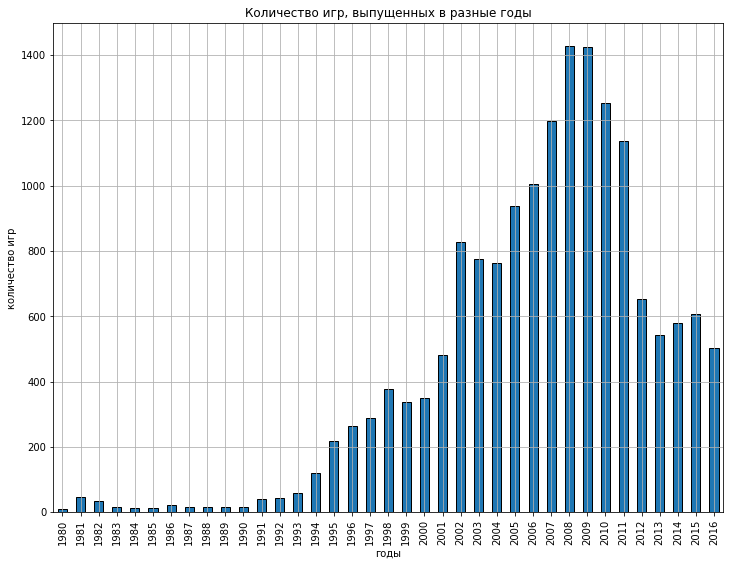

In [25]:
games.groupby('year_of_release')['name'].count()\
.plot(kind='bar',
      xlabel='годы',
      ylabel='количество игр',
      figsize=(12,9), 
      grid=True,
      ec='black',
      title = 'Количество игр, выпущенных в разные годы')
plt.show()

**Вывод:**

- До 1993 видеоигр практически не было. С 1994 года количество выпускаемых игр стремительно росло с каждым годом вплоть до 2009 года. Надо отметить, что в 2005 и 2006 годах Microsoft Xbox 360, Sony Playstation 3 и Nintendo Wii открыли современную эпоху игр с высоким разрешением. В 2008 - 2009 гг. мы видим пиковые значения по количеству видеоигр.
- После 2009 года на рынке произошел резкий спад по количеству игр. Если сравнивать 2009 и 2013 год, то можно заметить, что количество выпускаемых игр снизилось почти в 3 раза. И с 2013 по 2016 гг. количество выпускаемых игр держится почти на одном уровне.

### Анализ игровых платформ с наибольшими суммарными продажами

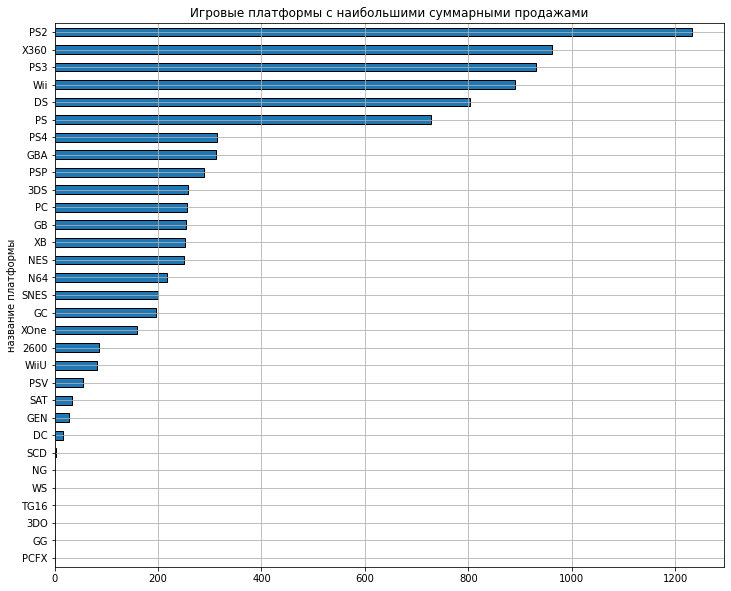

In [26]:
games.groupby('platform')['total_sales'].sum().sort_values()\
.plot(kind='barh',
      xlabel='название платформы',
      ylabel='сумма продаж',
      figsize=(12,10), 
      grid=True,
      ec='black',
      title = 'Игровые платформы с наибольшими суммарными продажами')
plt.show()

В целом можно сказать, что на рынке игровых консолей до 2016 г., ведущими платформами являлись: PS2, Xbox360, PS3, Nintendo DS и Wii.

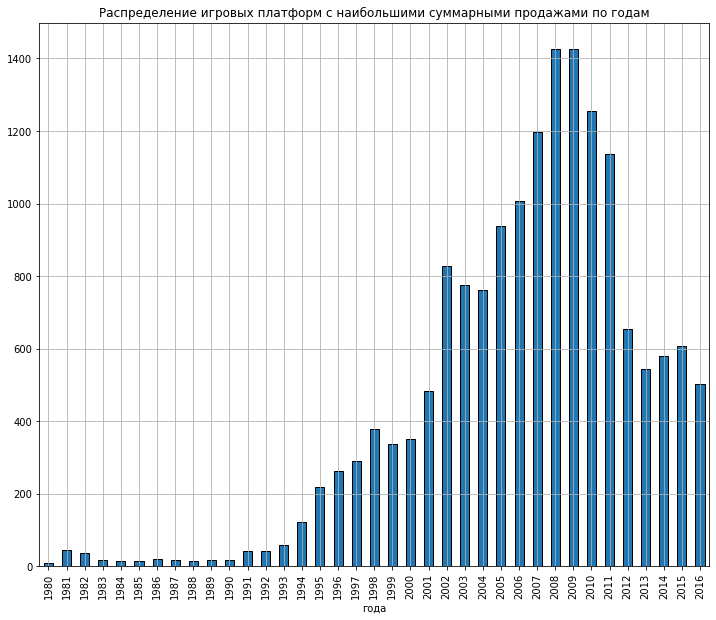

In [27]:
games.groupby('year_of_release')['platform'].count()\
.plot(kind='bar',
      xlabel='года',
      figsize=(12,10), 
      grid=True,
      ec='black',
      title = 'Распределение игровых платформ с наибольшими суммарными продажами по годам')
plt.show()

Мы видим, что самые высокие суммарные продажи по игровым платформам приходятся на 2002-2011 гг. Пиковые значения находятся на отметках 2008-2009 гг. Собственно, этот график повторяет информацию с графика "Количество игр, выпущенных в разные годы", что логично.

**Посчитаем сколько лет существовала каждая платформа:**

In [28]:
for platform in games['platform'].unique():
    minimum = games[(games['platform'] == platform)&(games['total_sales'] >= 0.1)]['year_of_release'].min()
    maximum = games[(games['platform'] == platform)&(games['total_sales'] >= 0.1)]['year_of_release'].max()
    if platform in games['platform'].unique() and maximum - minimum >1:
        print(f' Игровая платформа {platform} существовала с {minimum} до {maximum}, итого: {maximum - minimum} лет' )

 Игровая платформа Wii существовала с 2006 до 2016, итого: 10 лет
 Игровая платформа NES существовала с 1983 до 1994, итого: 11 лет
 Игровая платформа GB существовала с 1988 до 2001, итого: 13 лет
 Игровая платформа DS существовала с 2004 до 2013, итого: 9 лет
 Игровая платформа X360 существовала с 2005 до 2016, итого: 11 лет
 Игровая платформа PS3 существовала с 2006 до 2016, итого: 10 лет
 Игровая платформа PS2 существовала с 2000 до 2011, итого: 11 лет
 Игровая платформа SNES существовала с 1990 до 1999, итого: 9 лет
 Игровая платформа GBA существовала с 2001 до 2007, итого: 6 лет
 Игровая платформа PS4 существовала с 2013 до 2016, итого: 3 лет
 Игровая платформа 3DS существовала с 2011 до 2016, итого: 5 лет
 Игровая платформа N64 существовала с 1996 до 2001, итого: 5 лет
 Игровая платформа PS существовала с 1994 до 2003, итого: 9 лет
 Игровая платформа XB существовала с 2000 до 2008, итого: 8 лет
 Игровая платформа PC существовала с 1992 до 2016, итого: 24 лет
 Игровая платформа 26

Таким образом, в среднем игровая платформа живет 10 лет. Игровые компании осуществляют обновление своего продукта с периодичностью примерно в 6-7 лет, при этом после выпуска новой линейки приставок последующие 3-4 года старое поколение остается на поддержке и постепенно выводится из оборота. Часть игр выпускается как для новой версии платформы так и для старой.

***Выберем актуальный период, за который мы будем оценивать наши данные и строить предсказательные модели на 2017 год.***

По моему мнению актуальным является период начиная с 2013 года, т.к. в этот период вышли уже все популярные платформы и по ним всем есть данные. Рынок видеоигр динамично развивается и для составления прогноза на 2017 г. оптимально взять для анализа предыдущие 3 года.

Для дальнейшего анализа сделаем акцент на самых прибыльных и интересных с точки зрения прогнозирования платформах, это - PS, XBox и DS.

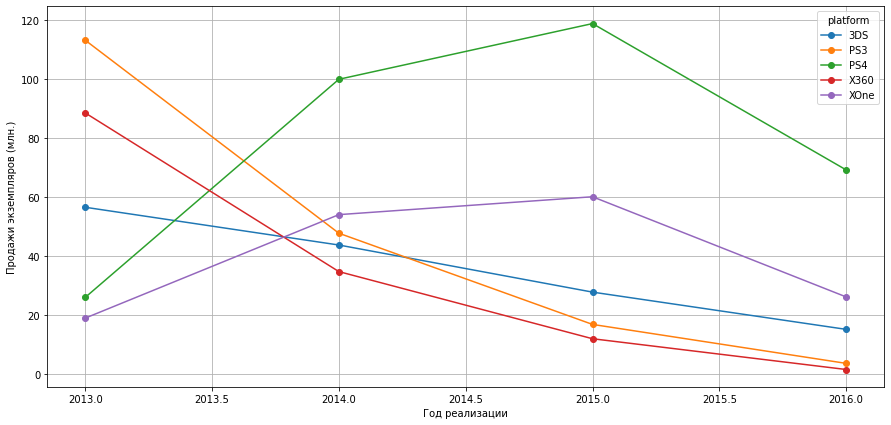

In [29]:
# Построим график распределения по годам с 2013 по 2016 (актуальный период)
data = games.query("year_of_release >=2013 and platform == ['XOne', 'X360', 'PS4', 'PS3', '3DS']")
data.pivot_table(index='year_of_release', 
                 columns = 'platform', 
                 values='total_sales', 
                 aggfunc='sum')\
.plot(grid=True, figsize=(15, 7), style='-o')
plt.xlabel('Год реализации')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

На конец 2016 года по продажам лидируют платформы PS4, XОne и 3DS.
Надо сказать, что исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Да и в целом, глядя на график, можно сказать, что весь рынок игр идет на снижение.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [30]:
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.090,0.280,14.60
PS3,345.0,0.525884,1.451939,0.01,0.04,0.150,0.510,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.200,0.730,14.63
X360,186.0,0.735484,1.663275,0.01,0.08,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.220,0.685,7.39


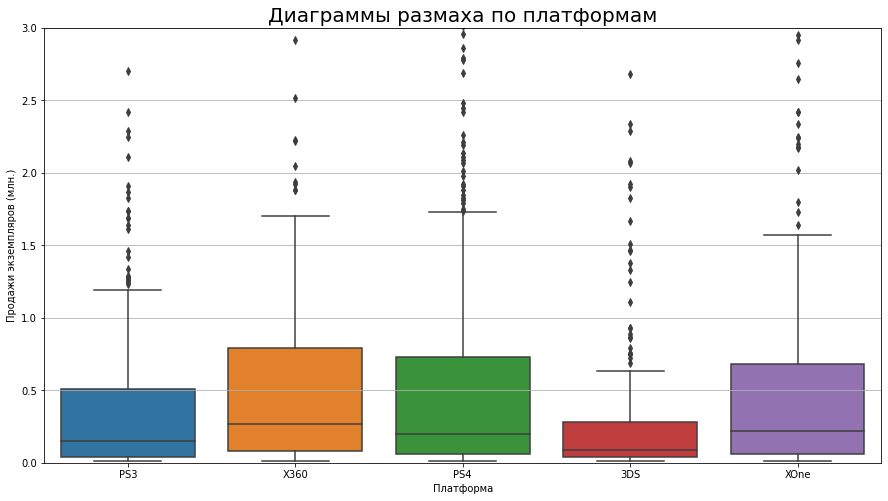

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(x='platform', y='total_sales', data=data)
plt.title('Диаграммы размаха по платформам', fontsize=20)
plt.xlabel('Платформа',fontsize=10)
plt.ylabel('Продажи экземпляров (млн.)',fontsize=10)
plt.grid(axis='y')
plt.ylim(0,3)
plt.show()

В среднем, выручка с продажи игр составляет около 1,1 млн долларов.
Медиана по лидирующим платформам находится в диапазоне от 0,12 до 0,17 млн долларов прибыли за игру.
Среди всех платформ выделяется Nintendo DS - у него показатели продаж сильно ниже всех остальных. Медиана < 0,1 млн долларов, верхняя граница - 0,5 млн.

#### Влияние на продажи платформы отзывов пользователей и критиков

За образец возьмем PS4 - она давно на рынке, по ней достаточно данных и на конец 2016 года она является одной из самых популярных игровых платформ.

***Как влияют на продажи платформы отзывы критиков:***

In [32]:
game_ps4 = data[(data['platform'] == 'PS4') & (data['critic_score'] != -1)]

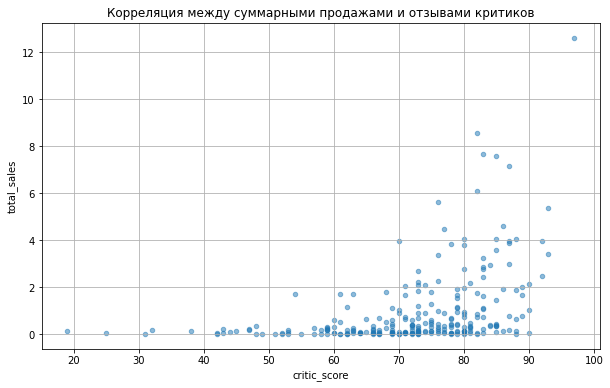

In [33]:
game_ps4.plot(kind='scatter', 
              x='critic_score', 
              y='total_sales',
              alpha=0.5, 
              figsize=(10,6), 
              grid=True,
              title = 'Корреляция между суммарными продажами и отзывами критиков')
plt.show()

На графике мы видим слабую зависимость. С увеличением среднего рейтинга критиков средний уровень продаж игр немного увеличивается. Чем больше обзоров и высоких оценок у игры, тем больше денег она приносит разработчику.

***Как влияют на продажи платформы отзывы пользователей:***

In [34]:
game_ps4 = data[(data['platform'] == 'PS4') & (data['user_score'] != -1)]

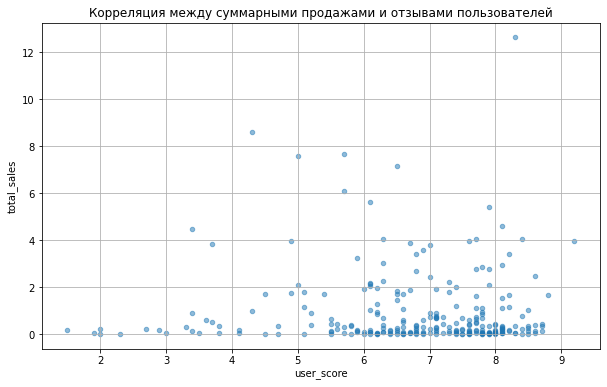

In [35]:
game_ps4.plot(kind='scatter', 
              x='user_score', 
              y='total_sales', 
              alpha=0.5, 
              figsize=(10,6), 
              grid=True,
              title = 'Корреляция между суммарными продажами и отзывами пользователей')
plt.show()

На диаграмме видим похожую картину как и в случае с отзывами критиков.

***Посмотрим на корреляцию между отзывами и продажами***

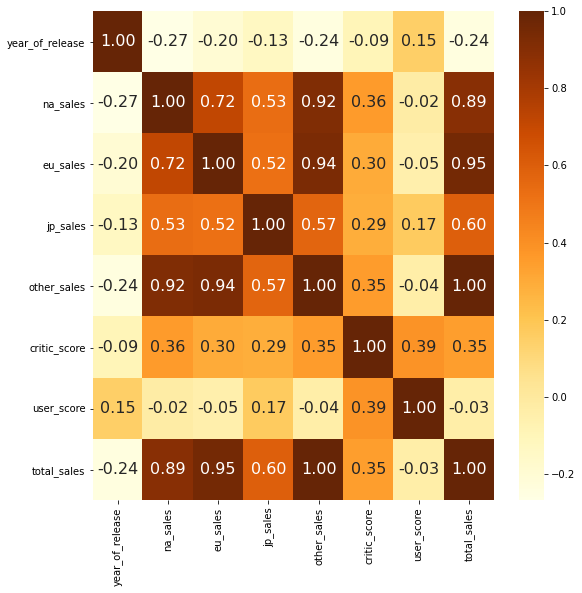

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(game_ps4.corr(), annot=True, cmap="YlOrBr", fmt='.2f', annot_kws={'size':16})
plt.show()

In [37]:
game_ps4_filtered = game_ps4[['total_sales' ,'critic_score', 'user_score']]

In [38]:
game_ps4_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False)

,total_sales
total_sales,1.000000
critic_score,0.350407
user_score,-0.031957


Таким образом, стоимость игр имеет слабую зависимость от оценки критиков (коэффициент Пирсона 0,4). А оценки пользователей вовсе не влияют продажи игр.

***Соотнесем выводы с продажами игр на других платформах***

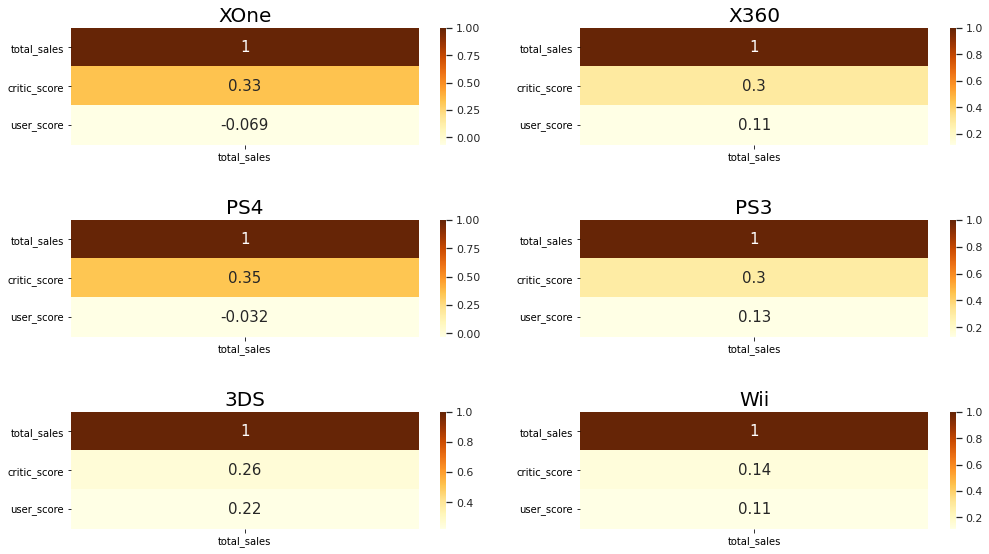

In [39]:
popular_platforms = ['XOne', 'X360', 'PS4', 'PS3', '3DS', 'Wii']

rows = len(popular_platforms)//2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        choose_platform = popular_platforms[count]
        df_prepare = games[(games['platform'] == choose_platform) & (games['user_score'] != -1)].copy()
        
        df_filtered = df_prepare[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="YlOrBr", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(choose_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Выше всего корреляция между продажами и оценкой критиков у платформ XOne, X360, PS3, PS4. Корреляция между продажами и оценкой пользователей имеет очень слабую зависимость практически везде. На общем фоне выделяется платформа Wii по которым зависимость в обоих случаях слабая.

#### Общее распределение игр по жанрам

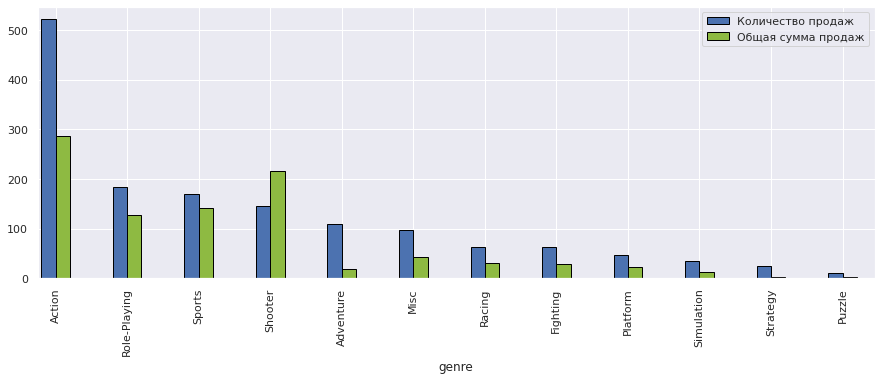

In [40]:
ax = plt.gca()

pivot = data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#8EBA42', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.show()

Самые популярные жанры игр: Action, Role-Playing, Sports, Shooter.

Менее популярными жанрами являются: Adventure, Simulation, Racing, Fighting, Misc, Platform. Strategy и Puzzle имеют самое маленькое количество проданных копий и самую маленькую сумму выручки, можно сказать не сильно пользуются спросом. Но надо сказать, что производство игр, которые мы выделили как "популярные" и требуют больше затрат на создание по сравнению с остальными.

Также можно заметить, что совсем небольшую вырычку с продаж приносят игры в жанре Adventure, а количество проданных копий достаточно высокое.

In [41]:
#посмотрим на средние и медианные продажи по жанрам
(data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'count'])
 .reset_index().sort_values(('mean', 'total_sales'), ascending=False))

,genre,sum,mean,median,count
,,total_sales,total_sales,total_sales,total_sales
8,Shooter,216.22,1.491172,0.620,145
10,Sports,142.48,0.838118,0.365,170
7,Role-Playing,127.83,0.694728,0.180,184
0,Action,285.96,0.548868,0.140,521
6,Racing,31.46,0.491563,0.180,64
4,Platform,22.88,0.486809,0.240,47
3,Misc,43.57,0.444592,0.130,98
2,Fighting,27.91,0.443016,0.150,63
9,Simulation,13.05,0.372857,0.100,35


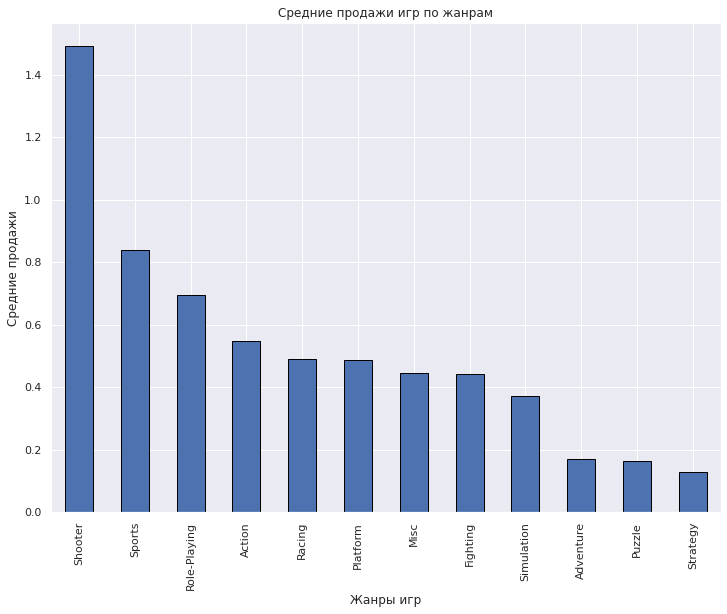

In [42]:
data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)\
.plot(kind='bar',
      xlabel='Жанры игр',
      ylabel = 'Средние продажи',
      figsize=(12,9), 
      grid=True,
      ec='black',
      title = 'Средние продажи игр по жанрам')
plt.show()

Игры жанра Shooter абсолютные лидеры по средним продажам. А жанр Action в свою очередь является лидероми по валовым продажам, но по медианым продажам уступают жанрам Shooter, Sports и Role-Playing.

Жанры Strategy и Puzzle имеют самое низкое колличество средних продаж.

## Шаг 4. Портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5). 

In [51]:
def regions_plot(groupby, region_sales, ax):
    pivot = data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'blue', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.title.set_size(20)

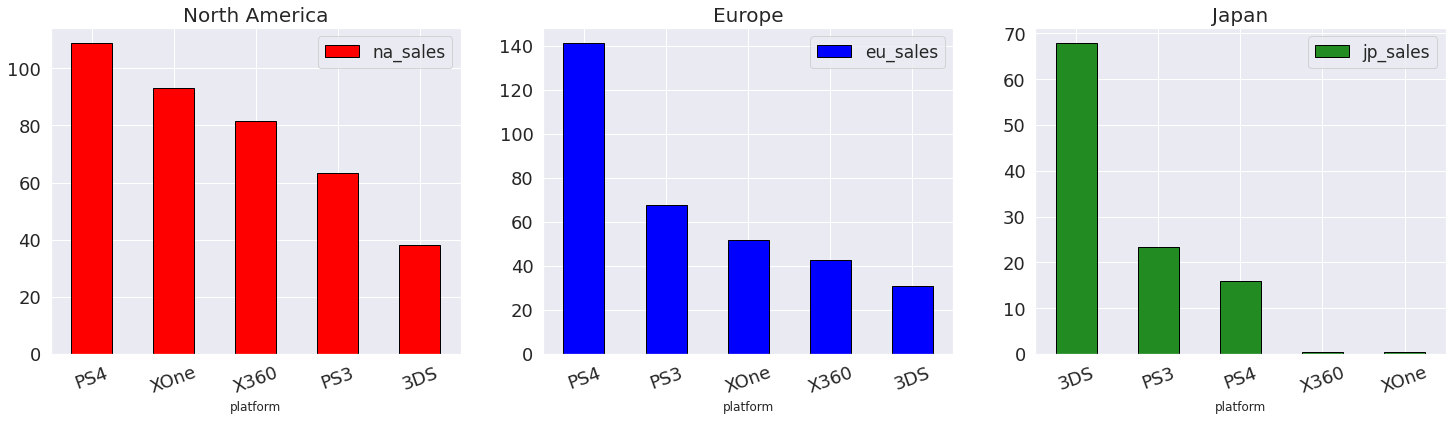

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
regions_plot('platform', 'na_sales', 0)
regions_plot('platform', 'eu_sales', 1)
regions_plot('platform', 'jp_sales', 2)

В Северной Америке популярны приставки PS4, XOne и X360. Чуть менее популярны PS3 и 3DS.

В Европе самая высокая популярность у PS4. За ней идут PS3, XOne, X360 и 3DS.

В Японии абсолютный лидер - 3DS. За ними американские PS3 и PS4. XOne и X360 составляют мизерную долю.

### Самые популярные жанры (топ-5)

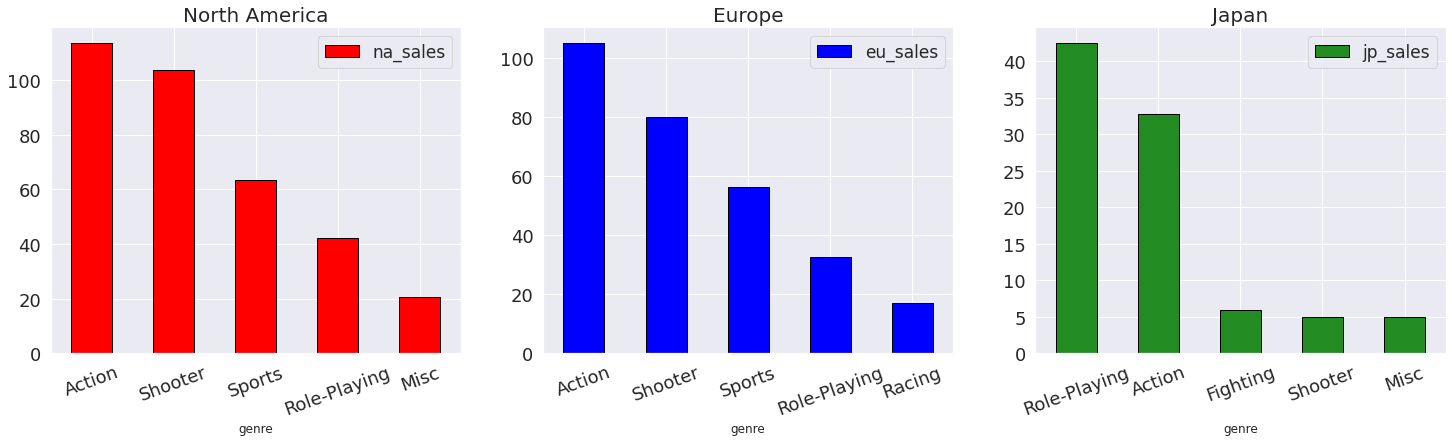

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

regions_plot('genre', 'na_sales', 0)
regions_plot('genre', 'eu_sales', 1)
regions_plot('genre', 'jp_sales', 2)

Вкусы пользователей в Северной Америке и Европе практически идентичны, самый популярный жанр - Action, второе место занимает Shooter, на третьем месте игры в жанре Sports.

Для японских пользователей наибольший интерес вызывают игры жанров Role-Playing и Action, остальные жанры пользуются гораздо меньшей популярностью, и распределены равномерно.

### Влияние рейтинга ESRB на продажи в отдельном регионе

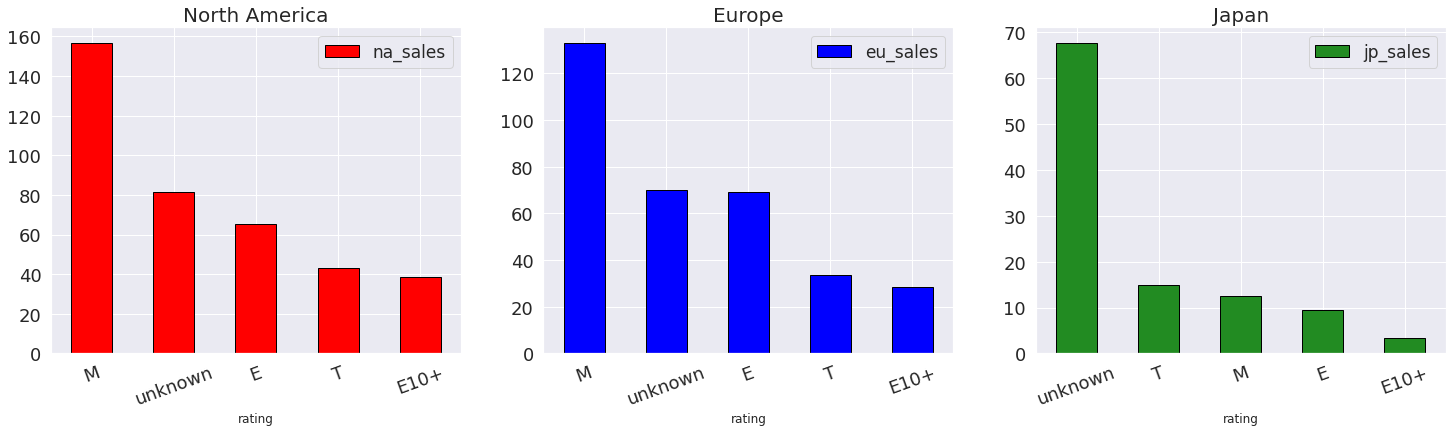

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
regions_plot('rating', 'na_sales', 0)
regions_plot('rating', 'eu_sales', 1)
regions_plot('rating', 'jp_sales', 2)

Напомним себе значения категорий:
- E(«Everyone») - подходит для всех возрастных категорий. 
- E 10+ («Everyone 10 and older») -  подходит для лиц старше 10 лет.
- T(«Teen») - подходит для лиц старше 13 лет. 
- M(«Mature») - подходит для лиц старше 17 лет. 
- Unknown - без категории.

Американцы и Европейцы больше всего они играю в игры с рейтингом "М" для лиц старше 17 лет (~160 и ~130 млн копий), на втором и третьем месте игры с неизвестным рейтингом и подходящие для всех возрастных категорий (около 80 млн копий), они одинаково популярны. Наименьший из всех спрос имеют игры с рейтингом "Е10+" и "Т".

В Японии пользователи в большинстве играют в игры, у которых вообще отсутствует рейтинг (около 70 млн), далее идет рейтинг "Т" (~16 млн копий), и рейтинги "М" и "Е" (по ~17 млн копий), игры для детей старше 10 лет имеют самый низкий спрос.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Да, такое влияние прослежвается и его видно на графиках. Исключением является регион - Япония, там суммарные продажи у игр без рейтинга гораздо выше по сравнению с остальными.

**Портрет пользователя каждого региона:**

У пользователей в Северной Америке популярны приставки PS4, XOne и X360. Чуть менее популярны PS3 и 3DS. Любимые жанры игр для них, это Action игры, шутеры и спортивные игры. В меньшей степени, но все же вызывает интерес игры в жанре Role-Playing. Отдает предпочтение играм с рейтингом "М".

В Европе одинаково самая высокая популярность у PS4. За ней идут PS3, XOne, X360 и 3DS. Вкусы касательно жанров игр и рейтингов схожи с Европейцем.

Японский пользователь предпочитает игровую приставку 3DS, а также в меньшей степени американские PS3 и PS4 и в основном играет Role-playing игры или в Action, больше всего игры без рейтинга.

Самыми не популярными жанрами для всех пользователей являются игры в жанре Puzzle и Strategy.

## Шаг 5. Проверка гипотез

Гипотеза, которую нужно проверить: **"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".**

В данном случае нам необходимо проверить есть ли статистически значимое различие между средними значениями генеральных совокупностей пользовательских рейтингов двух игровых платформ. Для проверки гипотезы будем использовать метод scipy.stats.ttest_ind(). 

In [47]:
xbox_one = games[(games['platform']=='XOne') & (games['user_score'] != -1)]['user_score']
ps = games[(games['platform']=='PC') & (games['user_score']!=-1)]['user_score']

alpha = 0.05

results = st.ttest_ind(xbox_one, ps)

print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.3037913196764759e-05
Отвергаем нулевую гипотезу


Таким образом, средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Гипотеза, которую нужно проверить: **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформулируем гипотезы:

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [48]:
genre_action = games[(games['genre']=='Action') & (games['user_score'] != -1)]['user_score']
genre_sports = games[(games['genre']=='Sports') & (games['user_score']!=-1)]['user_score']

alpha = 0.05

results = st.ttest_ind(genre_action, ps)

print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9013916203894785
Нет оснований отвергнуть нулевую гипотезу


Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Шаг 6. Общий вывод

***Мы проанализировали данные о продажах игр и игровых платформах, провели предобработку данных, исследовательский анализ, проверили некоторые гипотезы.***

**В результате предобработки данных:**
- Привели названия столбцов к одному регистру;
- Обнаружили и удалили пропуски в столбцах: 'name','genre','years_of_release'; 
- В столбцах 'critic_score', 'user_score' и 'rating' было принято решение не удалять пропуски в виду их большого количеств, а добавить значения заглушки. Также мы изменили значения 'tbd' на NaN для пользовательского рейтинга;
- Преобразовали типы данных в столбцах 'year_of_release' и 'user_score';
- Добавили новый столбец "total_sales", который содержит информацию о суммарной выручке по всему миру;
- Проверили данные на дубликаты.


**Из полученных данных были выявлены следующие наблюдения:**

- До 1993 видеоигр практически не было. С 1994 года количество выпускаемых игр стремительно росло с каждым годом вплоть до 2009 года. После кризиса 2008-2009 гг. на рынке был резкий спад. А с 2013 года количество выпускаемых игр стало стабильным и ежегодно держится почти на одном уровне. Можно сделать вывод, что вероятно не стоит ожидать резкого роста количества игр, так как игровая индустрия на сегодняшний день сформирована;

- Средний срок жизни игровой платформы - 10 лет, первую половину которых идет плавный рост продаж, а вторую - спад. Игровые компании осуществляют обновление своего продукта с периодичностью примерно в 6-7 лет, при этом после выпуска новой линейки приставок последующие 3-4 года старое поколение остается на поддержке и постепенно выводятся из оборота. Часть игр выпускается как для новой версии платформы так и для старой;

- Доминирующее положение в индустрии игровых консолей в течение значительного времени занимают  Sony playstation от Sonу, Xbox от Мicrosoft, а также портативные приставки Nintendo, Wii.Если рассматривать японский рынок, то платформа 3DS в Японии вне конкуренции;

- Оценки критиков слабо коррелируют с продажами игр, а оценкой пользователей вообще можно пренебречь, так она практически никак не связана с объемом продаж;

- Самые продаваемые игровые жанры - Action, Shooter, Role-Playing и Sports. Однако все иначе на японском рынке, там самые продаваемые жанры: Role-Playing и Action. Самыми не популярными жанрами для всех пользователей являются игры в жанре Puzzle и Strategy.;

- Возрастные рейтинги самых популярных игр - M(17+), E(6+), E10(10+) и T(13+). На японском рынке, большая часть всех игр продается без указания возрастного рейтинга ESRB;

**Портрет пользователя каждого региона:**

- У пользователей в Северной Америке популярны приставки PS4, XOne и X360. Чуть менее популярны PS3 и 3DS. Любимые жанры игр для них, это Action игры, шутеры и спортивные игры. В меньшей степени, но все же вызывает интерес игры в жанре Role-Playing. Отдает предпочтение играм с рейтингом "М".

- В Европе одинаково самая высокая популярность у PS4. За ней идут PS3, XOne, X360 и 3DS. Вкусы касательно жанров игр и рейтингов схожи с Европейцем.

- Японский пользователь предпочитает игровую приставку 3DS, а также в меньшей степени американские PS3 и PS4 и в основном играет Role-playing игры или в Action, больше всего игры без рейтинга.


***Проверка гипотез:***
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports различаются.
